In [56]:
# adjusting Jupyter Notebook style
from IPython.display import display, HTML
display(HTML("<style>.jp-Cell { width: 80% !important; }</style>"))

## Import modules

In [59]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# fundamentals

from importlib import reload

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# global settings - global_settings.py

if 'global_settings' in dir():
    del global_settings

from global_settings import *
import global_settings
global_settings = reload(global_settings)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# custom functions collection - functions.py

if 'functions' in dir():
    del functions

from functions import *
import functions
functions = reload(functions)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# local variables

debug_mode = False

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Modelling-related Modules
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import SelectPercentile

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Evaluation, optimization, metrics

from sklearn.metrics import recall_score, precision_score, precision_recall_curve, f1_score,\
roc_auc_score, roc_curve, auc, classification_report, confusion_matrix, fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.inspection import permutation_importance

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# model

from sklearn.linear_model import LogisticRegression

In [63]:
global_settings??

Type:        module
String form: <module 'global_settings' from '/Users/rafalfedro/Workbench/courses and tests/stackFuel/Portfolio/Portfolinoes/Notebooks/global_settings.py'>
File:        ~/Workbench/courses and tests/stackFuel/Portfolio/Portfolinoes/Notebooks/global_settings.py
Source:     
'''Project\'s global settings:
    - essential modules
    - global variables
    - matplotlib and seaborn settings
'''

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# import essential modules

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# global variables

random_seed = 42
random_seed_split = 0
pd.options.display.float_format = '{:.2f}'.format

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# color palette

# 0 - main_color, 1 - accent_color
color_palette = {0:'#85d4c8', 1:'#fc6226', 2:'#fc037f'} # db4125 fc6226 
sns_color_palett

In [57]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# suppress warnings

from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

## Prepare F2 metric
**F2** is a variant of harmonic mean between recall and precision, with a stronger weight on the **recall**

Using such a metric for measuring our model's performance is beneficial, since:
- we want to classify correctly as many observations close to leaving (approaching the threshold of target class 1)(optimize FN -> recall)
- at the same time we want to optimize resources used to keep the people falsely predicted as leaving (FP - False Positive -> precision), precision plays a factor, but it's less important than recall

**F0.5** - f-beta with beta=0.5 (more weight on **precision**, less weight on **recall**)\
**F1** - f-beta with beta=1\
**F2** - f-beta with beta=2 (more weight on **recall**, less on **precision**)

In [58]:
from sklearn.metrics import make_scorer,fbeta_score

def f2_score(y_true, y_pred):
    score = fbeta_score(y_true, y_pred, beta=2)
    return score

def f2():
    return make_scorer(f2_score)

## Load, clean and resample the data

In [117]:
raw_data = pd.read_csv('../Data/HR_Analytics.csv')

In [118]:
def sampling_data(DF):
    '''Only to be performed on the train-sets. Handles the outliers, encodes target vector and removes duplicates.
    '''
    DF.drop_duplicates(inplace=True)
    # not sure if it's a good practice to do it on the test set, maybe after split?
    # if happens after the split - requires reindexing of the target vector
    
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # Attrition label encoding
    DF.loc[:,('Attrition')].replace({'Yes': 1, 'No': 0}, inplace=True)
    
    return DF

data = sampling_data(raw_data)

In [119]:
print('Duplicated observations: {}'.format(data.duplicated().sum()))

Duplicated observations: 0


In [175]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# train-test split

Xtrain, Xtest, ytrain, ytest = train_test_split(data.drop('Attrition', axis=1), 
                                                data['Attrition'], 
                                                test_size=0.2, 
                                                shuffle=True,
                                                stratify=data['Attrition'], 
                                                random_state=random_seed_split)
                                                # is stratify practically like undersampling or keeps the original proportion?

In [174]:
# Assign columns to column groups
catcols = ['AgeGroup', 'SalarySlab', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
numcols = ['Education', 'EnvironmentSatisfaction', 'BusinessTravel', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 
           'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'OverTime', 'Gender', 'Age', 'DailyRate', 'DistanceFromHome', 
           'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 
           'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
delcols = ['EmpID', 'EmployeeNumber']

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# clean data

def clean_data(DF, delcols=delcols):
    # df = DF.drop_duplicates()  
    df = DF.copy()
    
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # drop columns with 1 unique value (std=0)
    # practically: 'EmployeeCount', 'StandardHours', 'Over18'
    
    mask_single_value = list(df.nunique().index.values[df.nunique() == 1])
    df = df.loc[:, ~df.columns.isin(mask_single_value)]
    
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # drop prediction-useless columns
    
    for column in delcols:
        if column in df.columns.values:
            df = df.drop(column, axis=1)
        
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # categ. - label encoding
    
    # df['AgeGroup'].replace({'18-25': 0,
    #                         '26-35': 1,
    #                         '36-45': 2,
    #                         '46-55': 3,
    #                         '55+': 4
    #                        }, inplace=True)
    # df['BusinessTravel'].replace({'Non-Travel': 0,
    #                                'Travel_Rarely': 1,
    #                                'TravelRarely': 1,
    #                                'Travel_Frequently': 2
    #                               }, inplace=True)
    # df['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)   # potentially better to one-hot encode
    # df['MaritalStatus'].replace({'Single': 0,
    #                              'Divorced': 1,
    #                              'Married': 2
    #                             }, inplace=True)
    # df['SalarySlab'].replace({'Upto 5k': 0,
    #                           '5k-10k': 1,
    #                           '10k-15k': 2,
    #                           '15k+': 3}, inplace=True)
    # df['OverTime'].replace({'Yes': 1, 'No': 0}, inplace=True)
    # df['PerformanceRating'].replace({3: 0, 4: 1}, inplace=True)
    
    # Encoding as in SVC
    df = df.replace({"Yes": 1,
                     "No": 0,
                     "Non-Travel": 0,
                     "TravelRarely": 1,
                     "Travel_Rarely": 1,
                     "Travel_Frequently": 2})
    
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # NaN handling: fillna with median (temp)
        
    #df = df.dropna(axis=0)
    df = df.fillna(value={'YearsWithCurrManager': df.loc[:,'YearsWithCurrManager'].median()})
    
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # Data Types Conversion
    
    col_dtypes = {'YearsWithCurrManager': 'int8',
                  'Department': 'category',
                  'EducationField': 'category',
                  'JobRole': 'category'
                 }

    # for key in col_dtypes:
    #     df[key] = df[key].astype(col_dtypes[key])
    
    return df

In [176]:
Xtrain = clean_data(Xtrain)
Xtest = clean_data(Xtest)

In [129]:
# Undersampling - reducing the number of Attrition = 0 / No

from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=random_seed)

X_under, y_under = undersampler.fit_resample(Xtrain, ytrain)

# class distribution
pd.crosstab(y_under, columns='count')

col_0,count
Attrition,
0,190
1,190


In [124]:
# Oversampling - increasing the minority class

from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

X_over, y_over = oversampler.fit_resample(Xtrain, ytrain)

# class distribution
pd.crosstab(y_over, columns='count')

col_0,count
Attrition,
0,988
1,988


In [177]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1178 entries, 1278 to 640
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1178 non-null   int64  
 1   AgeGroup                  1178 non-null   object 
 2   BusinessTravel            1178 non-null   int64  
 3   DailyRate                 1178 non-null   int64  
 4   Department                1178 non-null   object 
 5   DistanceFromHome          1178 non-null   int64  
 6   Education                 1178 non-null   int64  
 7   EducationField            1178 non-null   object 
 8   EnvironmentSatisfaction   1178 non-null   int64  
 9   Gender                    1178 non-null   object 
 10  HourlyRate                1178 non-null   int64  
 11  JobInvolvement            1178 non-null   int64  
 12  JobLevel                  1178 non-null   int64  
 13  JobRole                   1178 non-null   object 
 14  JobSat

### Prepare preprocessing

In [178]:
# define num_cols and cat_cols

num_cols = list(Xtrain.select_dtypes(include='number').columns.values)
# cat_cols = list(Xtrain.select_dtypes(include='category').columns.values)
cat_cols = list(Xtrain.select_dtypes(include='object').columns.values)

In [179]:
# main pipeline

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
knnimp = KNNImputer(add_indicator=True)
simpimp = SimpleImputer(strategy='median')
std = StandardScaler()

imputer = simpimp

catpipe = make_pipeline(encoder)
numpipe = Pipeline([('imputer', simpimp),
                    ('scaler', std)])

coltrans = ColumnTransformer(transformers=[('encoder', encoder, cat_cols),
                                           ('numpipe', numpipe, num_cols)], remainder='drop')
selection = SelectPercentile(percentile=90) # percentile=10

### Instantiate classifier

In [180]:
model_name = 'Logistic Regression'
log = LogisticRegression(solver='saga',  
                         class_weight='balanced',
                         max_iter=int(1e4),
                         random_state=random_seed)

# check:
# solver='liblinear'

### Set search space

In [181]:
# np.set_printoptions(suppress=True) # to avoid scientific notation
# temp_x = np.linspace(start=0.01, stop=1, num=10, dtype='float')
# with logistic reg. you want to try the reg. values with increasing steps, not jumping from little regul. to a lot
temp_x = np.geomspace(start=0.001, stop=1000, num=14, dtype='float')
print(temp_x)

[1.00000000e-03 2.89426612e-03 8.37677640e-03 2.42446202e-02
 7.01703829e-02 2.03091762e-01 5.87801607e-01 1.70125428e+00
 4.92388263e+00 1.42510267e+01 4.12462638e+01 1.19377664e+02
 3.45510729e+02 1.00000000e+03]


In [193]:
search_space = {'estimator__C': np.geomspace(start=0.136, stop=0.138, num=20, dtype='float'),
                'estimator__penalty': ['l1', 'l2']  # l1 - lasso; l2 - ridge
                #'selector__percentile': [90]
                #'prepper__numpipe__imputer__strategy': ['mean', 'median']
               }
# start=0.08, stop=0.085
# np.geomspace(start=0.0041, stop=0.00416, num=20, dtype='float')  # best for 'saga'
# np.geomspace(start=0.21, stop=0.3, num=20, dtype='float')  # beginning of tunning of 'liblinear' 0.001 1000

## Pipeline finalization and grid search

In [194]:
pipe_log = Pipeline([('preproc', coltrans),
                     ('selector', selection),
                     ('estimator', log)])

pipe_log = GridSearchCV(estimator=pipe_log,
                        param_grid=search_space,
                        scoring=f2(),
                        cv=6,
                        verbose=3,
                        n_jobs=-1)
pipe_log.fit(Xtrain, ytrain)
#model_svc = pipe_svc.best_estimator_
#print(grid_svc.best_estimator_)

print(pipe_log.best_params_)
print(f'Best F2 score: {pipe_log.best_score_.mean():.2%}')
f_divline()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# prediction on the test set

ypred = pipe_log.best_estimator_.predict(Xtest)

print(f'F2 score on test set:\t{f2_score(ytest, ypred):.2%}')
print(f'Recall on test set:\t{recall_score(ytest, ypred):.2%}')
print(f'Precision on test set:\t{precision_score(ytest, ypred):.2%}')

Fitting 6 folds for each of 40 candidates, totalling 240 fits
{'estimator__C': 0.13662842747580378, 'estimator__penalty': 'l2'}
Best F2 score: 64.04%

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

F2 score on test set:	70.67%
Recall on test set:	85.11%
Precision on test set:	42.11%


LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42,
                   solver='saga')

Best parameters:

{'estimator__C': 0.13662842747580378, 'estimator__penalty': 'l2'}

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

              precision    recall  f1-score   support

  Stayed (0)     0.9650    0.7782    0.8616       248
    Left (1)     0.4211    0.8511    0.5634        47

    accuracy                         0.7898       295
   macro avg     0.6930    0.8146    0.7125       295
weighted avg     0.8783    0.7898    0.8141       295


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 



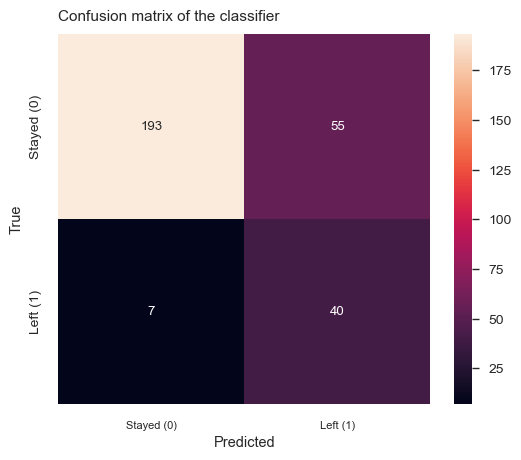

In [195]:
labels = ['Stayed (0)', 'Left (1)']

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# classification report

display(log)
print('Best parameters:\n\n{}'.format(pipe_log.best_params_))
f_divline()
print(classification_report(ytest, ypred, target_names=labels, digits=4))
f_divline()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# confusion matrix

plt.subplots(figsize=(6,4.8))

confusion_matrix_base = confusion_matrix(ytest, ypred)
conf_plot = sns.heatmap(confusion_matrix_base, annot=True, fmt='d')

plt.title('Confusion matrix of the classifier')
conf_plot.set_xticklabels(labels)
conf_plot.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True');

In [40]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# ROC visualization

def plot_roc(pipe, Xtest, ytest):
    
    yscores = pipe.predict_proba(Xtest)[:,1]
    fpr, tpr, _ = roc_curve(ytest, yscores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, color=color_palette[1], lw=1.2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=1.2, linestyle=(0, (8,10)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

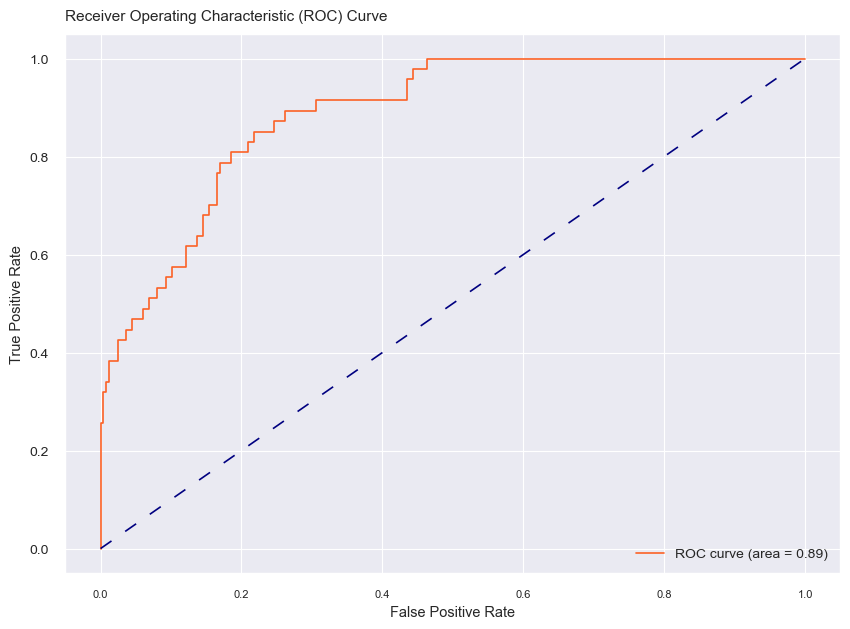

In [196]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# ROC plot

graph_roc = plot_roc(pipe_log, Xtest, ytest)

In [197]:
pd.options.display.float_format = '{:.5f}'.format

results = pd.DataFrame(pipe_log.cv_results_).sort_values(by='mean_test_score', ascending=False).head(8).T
results

,39,27,21,17,23,15,25,13
mean_fit_time,0.02985,0.03905,0.03520,0.05869,0.03898,0.03779,0.03786,0.05372
std_fit_time,0.00405,0.01812,0.00937,0.04500,0.01309,0.00739,0.01132,0.01075
mean_score_time,0.00245,0.00317,0.00307,0.00452,0.00241,0.00279,0.00243,0.00339
std_score_time,0.00032,0.00182,0.00155,0.00299,0.00014,0.00085,0.00009,0.00105
param_estimator__C,0.13800,0.13737,0.13705,0.13684,0.13715,0.13673,0.13726,0.13663
param_estimator__penalty,l2,l2,l2,l2,l2,l2,l2,l2
params,"{'estimator__C': 0.138, 'estimator__penalty': ...","{'estimator__C': 0.13736526392594048, 'estimat...","{'estimator__C': 0.1370489915390976, 'estimato...","{'estimator__C': 0.13683854793562977, 'estimat...","{'estimator__C': 0.1371543346749679, 'estimato...","{'estimator__C': 0.13673344734379184, 'estimat...","{'estimator__C': 0.13725975878316898, 'estimat...","{'estimator__C': 0.13662842747580378, 'estimat..."
split0_test_score,0.62827,0.62827,0.62827,0.62827,0.62827,0.62827,0.62827,0.62827
split1_test_score,0.61856,0.61856,0.61856,0.61856,0.61856,0.61856,0.61856,0.61856
split2_test_score,0.72581,0.72581,0.72581,0.72581,0.72581,0.72581,0.72581,0.72581


## Feature importance

In [198]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Estimate feature importance through permutation importance

result = permutation_importance(pipe_log, Xtrain, ytrain, n_repeats=50, random_state=random_seed)
importance_scores = result.importances_mean # abs

original_columns = Xtrain.columns
feature_importance_list = list(zip(original_columns, importance_scores))
sorted_feature_importance = sorted(feature_importance_list, key=lambda x: x[1], reverse=False)
orig_sorted_features, orig_sorted_importance = zip(*sorted_feature_importance)

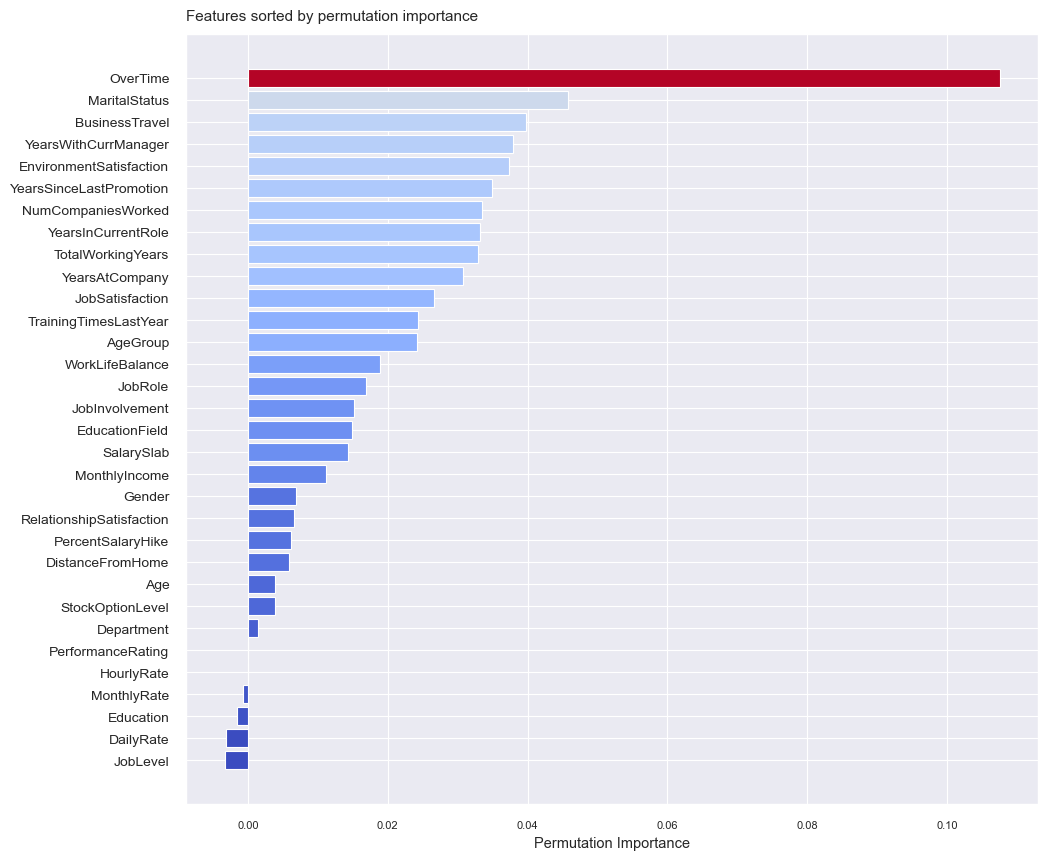

In [199]:
plt.rc('ytick', labelsize=10)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Visualization

import matplotlib as mpl
from matplotlib.cm import get_cmap

colors = []
cmap = mpl.colormaps['coolwarm']

# scale data
data = orig_sorted_importance
denominator = max(data) - min(data) # max(data) - min(data)
scaled_data = [(datum - min(data)) / denominator for datum in data]

for decimal in scaled_data:
    colors.append(cmap(decimal))


fig_feature_importance, ax = plt.subplots(figsize=(11,10))

ax.barh(orig_sorted_features, orig_sorted_importance, color=colors)
ax.set(title='Features sorted by permutation importance',
      xlabel='Permutation Importance');

#ax.set_xticklabels({:.2%})

In [45]:
# orig_sorted_importance

In [202]:
abs(result.importances_mean)

array([0.00393796, 0.02415621, 0.03973394, 0.00319843, 0.00142149,
       0.00593083, 0.00160884, 0.01481555, 0.03733718, 0.00683797,
       0.        , 0.0151066 , 0.00335207, 0.01694937, 0.02658159,
       0.04585588, 0.01110243, 0.01433942, 0.00071753, 0.03349255,
       0.1075238 , 0.00618672, 0.        , 0.00652663, 0.00386356,
       0.03287205, 0.02437479, 0.01893417, 0.0307984 , 0.03316391,
       0.03496383, 0.0379521 ])

# Feature Engineering

In [ ]:
# salary increase / time since last increase
# 'PercentSalaryHike' / 'YearsSinceLastPromotion'

In [ ]:
# 'YearsAtCompany' / 'YearsInCurrentRole' or 'YearsSinceLastPromotion'

In [ ]:
# 'MaritalStatus' vs 'Overtime' and 'BusinesTravel' or 'WorkLifeBalance'

In [ ]:
# 'YearsAtCompany' vs 'YearsWithCurrManager'

In [ ]:
# 'Age' vs 'YearsAtCompany'

In [ ]:
# 'Age' vs 'NumCompaniesWorked'